In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from ast import literal_eval
from matplotlib.colors import ListedColormap, BoundaryNorm, Normalize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import umap.umap_ as umap
import matplotlib

matplotlib.rc('font', family='Heiti TC')

In [3]:
# read data from csv
df = pd.read_csv('test.csv')
print(df[df['n_tokens'] < 40].shape[0])
print(df[df['n_tokens'] > 800].shape[0])

5478
1308


(63180, 8)
(61784, 8)


Text(0, 0.5, 'Density')

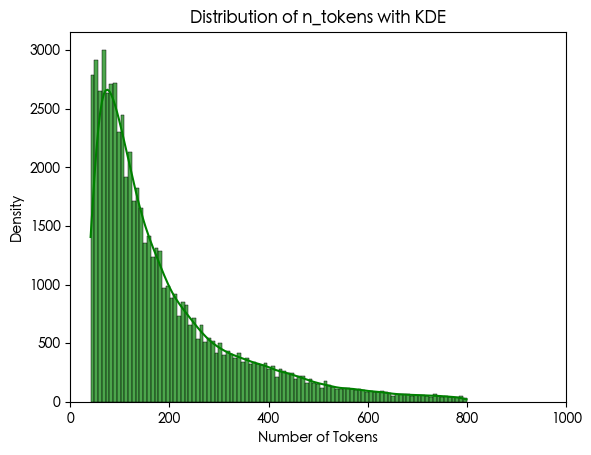

In [8]:
## keep n_tokens between 40 and 800
df = df[(df['n_tokens'] > 40) & (df['n_tokens'] < 800)]

## drop duplicates
print(df.shape)
df.drop_duplicates(subset=['place_id','user_id'],inplace=True)
print(df.shape)

sns.histplot(df['n_tokens'], kde=True, color='green', bins=100, alpha=0.7)
plt.xlim(0,1000)
plt.title('Distribution of n_tokens with KDE')
plt.xlabel('Number of Tokens')
plt.ylabel('Density')


In [9]:
# clustering
# convert embeddings to np.array metrix
df["embeddings"] = df.embeddings.apply(literal_eval).apply(np.array)
matrix = np.vstack(df.embeddings.values)
n_clusters = 10

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=5)
kmeans.fit(matrix)
labels = kmeans.labels_
df["Cluster"] = labels

In [10]:
# create UMAP reducer
reducer = umap.UMAP(n_neighbors=100,min_dist=0.1, n_components=2, metric='cosine')
data_umap = reducer.fit_transform(matrix)
df['umap_1'] = data_umap[:, 0]
df['umap_2'] = data_umap[:, 1]

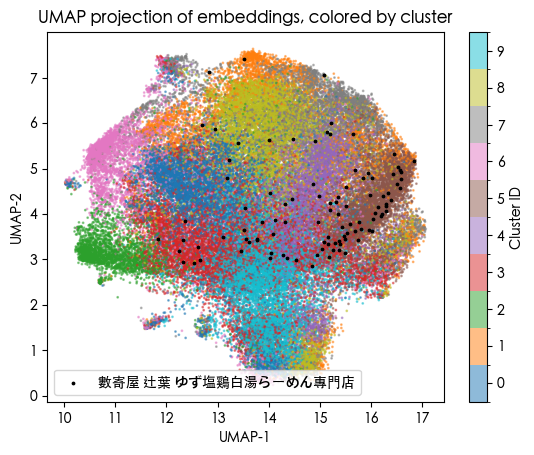

In [11]:
colors = plt.cm.tab10(np.linspace(0, 1, n_clusters))
cmap = ListedColormap(colors)
norm = BoundaryNorm(np.arange(-0.5, n_clusters + 0.5, 1), cmap.N)

mask = df['name'] == "Êï∏ÂØÑÂ±ã ËæªËëâ „ÇÜ„ÅöÂ°©È∑ÑÁôΩÊπØ„Çâ„Éº„ÇÅ„ÇìÂ∞àÈñÄÂ∫ó"

scatter = plt.scatter('umap_1', 'umap_2', s=1, c=labels, cmap=cmap, data=df,
                        norm=norm, alpha=0.5,label='')
plt.scatter(data_umap[mask, 0], data_umap[mask, 1], s=3, color='black',
                        alpha=1, label='Êï∏ÂØÑÂ±ã ËæªËëâ „ÇÜ„ÅöÂ°©È∑ÑÁôΩÊπØ„Çâ„Éº„ÇÅ„ÇìÂ∞àÈñÄÂ∫ó')
plt.colorbar(scatter, ticks=np.arange(n_clusters), label='Cluster ID')  # Adjust colorbar to show discrete values
plt.title('UMAP projection of embeddings, colored by cluster')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.legend()

In [52]:
# show clusters distribution of a ramen Êï∏ÂØÑÂ±ã ËæªËëâ „ÇÜ„ÅöÂ°©È∑ÑÁôΩÊπØ„Çâ„Éº„ÇÅ„ÇìÂ∞àÈñÄÂ∫ó
print(df[mask].groupby('Cluster').size().sort_values(ascending=False)
        .reset_index(name='Count')
        .assign(Percentage=lambda x: (x['Count'] / x['Count'].sum()) * 100)
        .assign(Accumulated=lambda x: (x['Percentage'].cumsum()) ))

# consider cluster 5,3,9,1 as features of Êï∏ÂØÑÂ±ã 

   Cluster  Count  Percentage  Accumulated
0        5     40   39.215686    39.215686
1        3     21   20.588235    59.803922
2        9     15   14.705882    74.509804
3        1     10    9.803922    84.313725
4        8      9    8.823529    93.137255
5        4      3    2.941176    96.078431
6        0      2    1.960784    98.039216
7        7      2    1.960784   100.000000


Text(0, 0.5, 'UMAP-2')

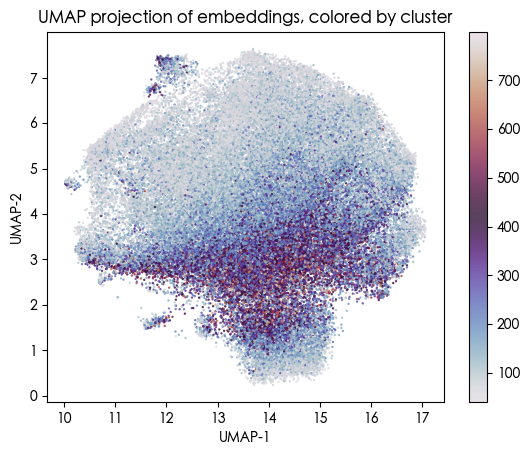

In [12]:
norm = Normalize(vmin=df['n_tokens'].min(), vmax=df['n_tokens'].max())

scatter2 = plt.scatter('umap_1', 'umap_2', s=0.5, c='n_tokens', cmap='twilight', data=df,
                        alpha=0.8,label='')
plt.colorbar(scatter2)
plt.title('UMAP projection of embeddings, colored by cluster')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')

In [27]:
## extract centroids from kmeans
centroids = kmeans.cluster_centers_

## check the vector dimensions
for i, centroid in enumerate(centroids):
    print(i,"\t",len(centroid))

0 	 1536
1 	 1536
2 	 1536
3 	 1536
4 	 1536
5 	 1536
6 	 1536
7 	 1536
8 	 1536
9 	 1536


In [105]:
## show the reviews with 5 highest similarity to the cluster's centroids
similarities_list = []
for i, centroid in enumerate(centroids):
    # Ë®àÁÆóÊØèÂÄãËÅöÈ°û‰∏≠ÂøÉËàáÂÖ∂ÂÆÉÈªûÁöÑÁõ∏‰ººÊÄß
    similarities = cosine_similarity([centroid],np.vstack(df[df.Cluster == i].embeddings.values))[0]
    similarities_list.extend(similarities)

df['similarities'] = similarities_list
    
for i in range(n_clusters):
    print(f"Cluster {i} ÁöÑ‰ª£Ë°®Ë©ïË´ñÔºö")
    print(df[df.Cluster == i].sort_values('similarities',ascending=False).combined.apply(lambda x: x.split('Content: ')[1])[0:5])
    print("\n")



Cluster 0 ÁöÑ‰ª£Ë°®Ë©ïË´ñÔºö
32588    ÁâπÂú∞‰æÜÈúßÂ≥∞ÂöêÈÆÆÊéíÈöäÁæéÈ£üü´∂ È∫µÂ±ãÈªëÂøÉüñ§ ÁúüÂøÉË¶∫Âæó‰∏çÈåØÂêÉÈ§íüòªÈõûËÇâËàáË±öÈ™®ËÇâÂ•ΩÂ•ΩÂêÉüòã ‰∏ãÂõûÂÜç‰æÜÂêÉ‰∏çÂêå...
38657    ÁúãÂà∞Ë©ïÂÉπ‰∏çÈåØÔºåÁâπÂà•ÈÅé‰æÜÂêÉÔºåË£°Èù¢ÂèØ‰ª•Ëá™Â∑±ÊéÉÊèèÈªûÈ§êÔºåÈªû‰∫Ü‰∏ÄÁ¢óË±öÈ™®ÊãâÈ∫µÔºåÁúãÂ∫óÂÆ∂Ë™™Ê≤íÊúâÊ∑ªÂä†‰ªª‰ΩïÂåñÂ≠∏Âíå...
31487                   Êñ∞Â∫ó‰∏çÂèØÈåØÈÅéÁöÑÊó•ÂºèÊãâÈ∫µ‰πã‰∏Ä Âª∫Ë≠∞ÂêÉÂà∞‰∏ÄÂçäÊôÇÊ∑ªÂä†Ê°å‰∏äÁöÑÂ§ßËíúËàáÈÜã‰∫´ÂèóÂë≥ËÆä
68021              ÊãâÈ∫µÂ•ΩÂêÉÔºåÁúüÁöÑ‰∏çËº∏ÈÇ£‰∫õÂêçÂ∫óÁöÑÊãâÈ∫µÔºåÈÇÑËÉΩ‰æùÁÖßËá™Â∑±ÁöÑÂñúÂ•ΩÂÆ¢Ë£ΩÊãâÈ∫µÂè£Âë≥ÔºåÊé®Ëñ¶Â§ßÂÆ∂‰æÜÂêÉ
37564     ÊúçÂãô‰∫∫Âì°ÈÉΩÊúÉÊ°åÈÇäË©¢Âïè ÈúÄ‰∏çÈúÄË¶ÅÂ∞èËèú„ÄÅÁÇ∏Áâ©ÔΩûË¶∫ÂæóË†ªË≤ºÂøÉÁöÑ ÊãâÈ∫µÂèØ‰ª•Ëá™Ë£Ωdiy ÈÅ∏Ëá™Â∑±ÂñúÊ≠°ÂêÉÁöÑÈÖçÊñôüòÜ
Name: combined, dtype: object


Cluster 1 ÁöÑ‰ª£Ë°®Ë©ïË´ñÔºö
29083    Â∫óÂÖßË£ùÊΩ¢Êòé‰∫ÆÔºåÁî®È§êÁí∞Â¢ÉËàíÈÅ© Êú¨Ê¨°Áî®È§êÈªûÁöÑÊòØÊµ∑ËÄÅÊ≤æÈ∫µÔºåÊπØÈ†≠ËÉΩÂöêÂà∞ÊªøÊªøÁöÑËù¶‰πãÈÆÆÂë≥ÔºåÂêåÊôÇÂèà‰∏çÊúÉÊÑüÂà∞...
34810    ÁæéÂë≥ÔºåÈÄ£Âπ≥Êó•‰∏ãÂçàÂä†Êàë‰πüÊúâ6‰ΩçÂÆ¢‰∫∫

In [86]:
## sort by n_tokens and calculate token accumulation by clusters
df['accumulated_n_tokens'] = df.groupby('Cluster').apply(lambda group: group['n_tokens'].iloc[np.argsort(group['similarities'].values)[::-1]].cumsum()).reset_index(level=0, drop=True)

/var/folders/3k/syzcms_55r97fjwz1s3h8kkm0000gn/T/ipykernel_86228/2335842415.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['accumulated_n_tokens'] = df.groupby('Cluster').apply(lambda group: group['n_tokens'].iloc[np.argsort(group['similarities'].values)[::-1]].cumsum()).reset_index(level=0, drop=True)


In [114]:
## double check
df[df.Cluster == 7][df[df.Cluster == 7].accumulated_n_tokens<16000].sort_values('accumulated_n_tokens')

Unnamed: 0             name                     place_id  \
63826        1212              ÂÆÆÂÖßÂ±ã  ChIJnWrLb7OuQjQRGiY9k9L0uB0   
66696        4151          ÂéüÂë≥ÂÑ™ÂìÅÊãâÈ∫µÂ∫ó  ChIJdcCJEAmsaTQR-s_nbFudAsI   
24855        4570  Êó•Êú¨ÂØåÂ£´ÂÖ´Â≥∞ÊãâÈ∫µ„ÄêÁ´πÂúçÊ∞ëÁîüÂ∫ó„Äë  ChIJQwDuz52vQjQReId08kx7h1E   
35811        5008           ÂçöÈ¢®Ë±öÈ™®ÊãâÈ∫µ  ChIJmXOoYmQ9aTQRLm8PZyA7AQw   
37688        1530            ÊãâÈ∫µÊ¨°ÈÉéÈï∑  ChIJje5R5Gg9aTQRw_xF8axw-LY   
...           ...              ...                          ...   
66166        3616        ÂçöÂ§öÊãâÈ∫µ Âè∞ÁÅ£Á∏ΩÂ∫ó  ChIJp7W0OdurQjQRiVquHEtoRg0   
35083        4280             Â∑ùÊæ§ÊãâÈ∫µ  ChIJ8aaVKMUXaTQRYrdE0dR8SoA   
65877        3327      ‰∏âÂèãÈæçÊ±ü-ÂêçÂè§Â±ã‰πæÊãåÈ∫µ  ChIJ_QPyd5OrQjQRbx2UqTVe4_8   
20645         333            Á±ΩÁî∞ÈáéËèúÂ±ã  ChIJFfHmpMY1aDQR8OZF6ermDo8   
66160        3610        ÂçöÂ§öÊãâÈ∫µ Âè∞ÁÅ£Á∏ΩÂ∫ó  ChIJp7W0OdurQjQRiVquHEtoRg0   

                     user_id  rating  \
63826  108558747375454324069       4   
66696  115834099245810261454       5   
24855  104778306297271194461       4   
35811  111940712633789263866       3   
37688  111847952272846366586       5   
...                      ...     ...   
66166  108929356001652908817       5   
35083  114020666236762799008       5   
65877  116810061096793595830       4   
20645  101466831332106522855       5   
66160  106701418350595051426       5   

                                                combined  n_tokens  \
63826  Score: ‚òÖ‚òÖ‚òÖ‚òÖ; Content: ÁúãÂà∞ÈôêÊôÇÊñôÁêÜÈúáÊíºÁôªÂ†¥~ÊØèÊó•ÈôêÈáè30‰ªΩ~Â∞±Âøç‰∏ç‰ΩèÊÉ≥...       118   
66696  Score: ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ; Content: ÂÉπÊ†º‰æÜË™™Êå∫ÂØ¶ÊÉ†ÁöÑ ÈÄôÊ¨°ÂêÉÈÆ™È≠öÊãâÈ∫µ„ÄÅÊπØÈ†≠ÊøÉÂ∫¶ÈÅ∏ÊôÆ...       191   
24855  Score: ‚òÖ‚òÖ‚òÖ‚òÖ; Content: ÁâõËÇâÈ£ØÈÇÑ‰∏çÈåØ... ÊãâÈ∫µÂèØ‰ª•ÂÖçË≤ªÂä†È∫µÔºåÈ£üÈáèÂ§ßÁöÑÂ≠©...        83   
35811  Score: ‚òÖ‚òÖ‚òÖ; Content: ÊπØÈ†≠ÊôÆÈÄöÔºåÈ¶ôÂë≥ÊúâÂá∫‰æÜ‰ΩÜÂÅèÊ≠ªÈππ‚ãØ ÁÇ∏ÈõûÊ≤íÊúâÂæàÂ§öÊ±Å‰πüÊ≤í...        59   
37688  Score: ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ; Content: Ë¶ÅÂêÉÈÅìÂú∞ÁöÑÂåóÊµ∑ÈÅìÊ¨°ÈÉéÈï∑ÊãâÈ∫µ‰∏çÁî®Âà∞Êó•Êú¨‰∫Ü„ÄÇ Á¨¨‰∏Ä...        84   
...                                                  ...       ...   
66166  Score: ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ; Content: (ÈôÑËèúÂñÆ)ÈªûÔºöÁÇ∏ÈõûÂçöÂ§öÊãâÈ∫µ(160) Êé®ÔºöÈõû ...       141   
35083  Score: ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ; Content: ÊòØÁúãÂΩ±Áâá‰æÜÂêÉÁöÑÔºåÊøÉÂéöÊπØÂ∫ïÁúüÁöÑË∂ÖÊøÉÁöÑÔºåÊ∏ÖÊ∑°ÁúüÁöÑ‰πü...        87   
65877  Score: ‚òÖ‚òÖ‚òÖ‚òÖ; Content: Âõ†ÁÇ∫ÂÖíÂ≠êÊâìÁêÉËÄåÊÑèÂ§ñÁôºÁèæÁöÑÈ§êÂª≥ Â∫óÂì°Âª∫Ë≠∞ÁöÑÊãõÁâå‰πæÊãå...       254   
20645  Score: ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ; Content: Êñ∞Á´πÁúüÁöÑÊòØËî¨È£üÂèãÂ•ΩÁöÑÂüéÂ∏Ç Á±ΩÁî∞ÈáéËèúÂ±ãÂèØ‰ª•ÈÖçÂêàÈúÄ...       171   
66160  Score: ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ; Content: ÁÜ±È®∞È®∞ÁöÑÊãâÈ∫µ ÂøÖÈªûÁöÑÁÇ∏Ë±ÜËÖê  ÊãúË®óüôè‰∏ÄÂÆöË¶ÅÂêÉÁÇ∏...       130   

                                              embeddings  Cluster     umap_1  \
63826  [0.014899932779371738, -0.022665003314614296, ...        7  13.290475   
66696  [0.0015914876712486148, 0.018943144008517265, ...        7  15.388591   
24855  [0.001092615188099444, -0.01717764511704445, -...        7  14.719680   
35811  [0.061403580009937286, 0.042823124676942825, -...        7  15.911200   
37688  [0.013637819327414036, 0.0021545235067605972, ...        7  14.581451   
...                                                  ...      ...        ...   
66166  [-0.004606251139193773, -0.040901683270931244,...        7  15.757207   
35083  [0.028656063601374626, -0.017308345064520836, ...        7  14.849943   
65877  [0.013262455351650715, 0.0030464893206954002, ...        7  13.760496   
20645  [-0.003313167719170451, -0.004856362473219633,...        7  12.758296   
66160  [-0.005974148865789175, -0.0309795830398798, -...        7  14.781989   

         umap_2  similarities  accumulated_n_tokens  
63826  5.148411      0.920832                   118  
66696  6.347129      0.917001                   309  
24855  5.830207      0.916719                   392  
35811  6.493450      0.915801                   45

In [90]:
## gpt-3.5-turbo-0125 only support 16K context window
for i in range(n_clusters):
    n_reviews = len(df[df.Cluster == i][df[df.Cluster == i].accumulated_n_tokens<16000].sort_values('accumulated_n_tokens'))
    print(f"Cluster{i} has total {n_reviews} reviews to use below max token")

Cluster0 has total 140 reviews to use below max token
Cluster1 has total 152 reviews to use below max token
Cluster2 has total 86 reviews to use below max token
Cluster3 has total 61 reviews to use below max token
Cluster4 has total 84 reviews to use below max token
Cluster5 has total 76 reviews to use below max token
Cluster6 has total 149 reviews to use below max token
Cluster7 has total 146 reviews to use below max token
Cluster8 has total 157 reviews to use below max token
Cluster9 has total 42 reviews to use below max token


In [115]:
# concat reviews into a string
df[df.Cluster == 7][df[df.Cluster == 7].accumulated_n_tokens<16000].sort_values('accumulated_n_tokens').combined.apply(lambda x: x.split('Content: ')[1]).str.cat(sep=" ")

'ÁúãÂà∞ÈôêÊôÇÊñôÁêÜÈúáÊíºÁôªÂ†¥~ÊØèÊó•ÈôêÈáè30‰ªΩ~Â∞±Âøç‰∏ç‰ΩèÊÉ≥Èªû‰æÜÂöêÂöêÁúã‰∫Ü~ÁÇ∏ÁâõËÇâÈ§ÖÁ¢∫ÂØ¶ÊòØ‰∏çÈåØÂêÉ~ÊãâÈ∫µÈÇÑÊúâÂπ≤Ë≤ù~ÁÇ∏Ë±ÜËÖê‰πü‰∏çÈåØ~ÊòØÂÄãÂÄºÂæó‰æÜÂöêÈÆÆ‰∏Ä‰∏ãÁöÑÂ•ΩÂ∫óüëç ÂÉπÊ†º‰æÜË™™Êå∫ÂØ¶ÊÉ†ÁöÑ ÈÄôÊ¨°ÂêÉÈÆ™È≠öÊãâÈ∫µ„ÄÅÊπØÈ†≠ÊøÉÂ∫¶ÈÅ∏ÊôÆÈÄö„ÄÅ‰ΩÜÊÑüË¶∫ÊáâË©≤ÈÅ∏ÊøÉ„ÄÇ  ÊâãÂç∑Á≥ªÂàóÂæà‰∏çÈåØüëç  ÁÇ∏Áâ©Âè™ÊúâÈªûË±ÜËÖêÔºåÂæàÂÑ™ÁßÄÔºåÊúüÂæÖÂêÉÂÖ∂‰ªñÁÇ∏Áâ©‚ù§Ô∏è  ÂèâÁáí‰∏ºËÇâÁâáÂæàÂéöÂØ¶ÔºåÂª∫Ë≠∞Êê≠ÈÖçÊãâÈ∫µÔºå‰∏çÁÑ∂ÊúâÈªû‰πæ„ÄÇ  Âª∫Ë≠∞Êê≠ÈÖçËèúÂñÆÂúñÁâá‰∏ÄËµ∑ÁúãÔºåËèúÂñÆÂúñÁâáÂæàÁúüÂØ¶„ÄÇ ÁâõËÇâÈ£ØÈÇÑ‰∏çÈåØ... ÊãâÈ∫µÂèØ‰ª•ÂÖçË≤ªÂä†È∫µÔºåÈ£üÈáèÂ§ßÁöÑÂ≠©Â≠êÂæàÂâõÂ•Ω„ÄÇÊ§íÈπΩÁÇ∏ÈõûÈ£ØÁöÑÁÇ∏ÈõûÊúâÈªû‰πæÔºå‰ΩÜÈÖçËèúÂæàok... ÊπØÈ†≠ÊôÆÈÄöÔºåÈ¶ôÂë≥ÊúâÂá∫‰æÜ‰ΩÜÂÅèÊ≠ªÈππ‚ãØ ÁÇ∏ÈõûÊ≤íÊúâÂæàÂ§öÊ±Å‰πüÊ≤íÊúâÂæà‰πæÊü¥„ÄÇ Ë¶ÅÂêÉÈÅìÂú∞ÁöÑÂåóÊµ∑ÈÅìÊ¨°ÈÉéÈï∑ÊãâÈ∫µ‰∏çÁî®Âà∞Êó•Êú¨‰∫Ü„ÄÇ Á¨¨‰∏ÄÊ¨°ÈÅé‰æÜÂêÉÔºågoolË©ïË´ñÂèØ‰ª•Áé©ËΩâËº™Áõ§Â±ÖÁÑ∂Áé©Âà∞ÁÇ∏ÈõûÂÖçË≤ªÔºåÂæàÂ•ΩÁé©„ÄÇ ÁÖéÈ§ÉË∑üÂõûÈçãËÇâÂÆöÈ£üÊØèÊ¨°‰æÜÂøÖÈªûÔºÅÂõûÈçãËÇâÂæà‰∏ãÈ£Øüëç ‰∏ÄÂÖ•Âè£Â∞±ÊòØÊó•ÂºèÊãâÈ∫µÂë≥ÈÅìÔºåÂ•ΩÂêÉÔºå‰ΩÜ‰

In [91]:
## import OpenAI client
from openai import OpenAI
from dotenv import load_dotenv
import os

OpenAI_API_KEY = os.getenv("openAI_API_Key")
client_openai = OpenAI(api_key=OpenAI_API_KEY)

In [113]:
## use gpt3.5 to summerize each cluster's reviews
system_content = "‰Ω†ÊòØ‰∏ÄÂÄãÊãâÈ∫µÊÑõÂ•ΩËÄÖÔºåÊúÉÈáùÂ∞çË©ïË´ñÊé®Ëñ¶ÊúãÂèãÂéªÊãâÈ∫µÂ∫ó„ÄÇË´ãÂïèÈÄô‰∫õÂ∞çÊñºÊãâÈ∫µÂ∫óÁöÑË©ïË´ñÈÉΩÊèêÂà∞Âì™‰∫õÂ∫óÂÆ∂ÁâπËâ≤ÔºüË´ãÁ∏ΩÁµêÊúÄÂ∏∏Âá∫ÁèæÁöÑ20ÂÄãË©ûÂΩô‰ª•ÂèäË™ûÂè•ÔºåÈáùÂ∞çÂêÑÈ†ÖÁâπËâ≤ÂøÖÈ†àË¶ÅÊúâÂΩ¢ÂÆπË©û"

for i in range(n_clusters):
    print(f"Cluster {i} Theme:", end=" ")

    reviews = (df[df.Cluster == i][df[df.Cluster == i].accumulated_n_tokens<16000]
                .sort_values('accumulated_n_tokens')
                .combined.apply(lambda x: x.split('Content: ')[1])
                .str.cat(sep=" "))

    messages = [
        {
            "role": "system",
            "content": system_content
        },
        {
            "role": "user", 
            "content": reviews
        }
    ]

    response = client_openai.chat.completions.create(
        model="gpt-3.5-turbo-0125",
        messages=messages,
        temperature=0,
        max_tokens=512,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )

    print(f"Cluster{i} features:")
    print(response.choices[0].message.content)
    print("-" * 100)

Cluster 0 Theme: Cluster0 features:
Ê†πÊìö‰ª•‰∏äË©ïË´ñÔºåÈÄô‰∫õÊãâÈ∫µÂ∫óÁöÑÁâπËâ≤ÂåÖÊã¨Ôºö

1. ÊπØÈ†≠ÊøÉÈÉÅ
2. È∫µÊ¢ùQÂΩà
3. ÂèâÁáíÂÖ•Âë≥
4. Êèê‰æõËá™Ë£ΩÈÖçÊñô
5. Êèê‰æõÂÆ¢Ë£ΩÂåñÂè£Âë≥
6. Êèê‰æõÂÖçË≤ªÂä†È∫µ
7. Êèê‰æõÂÖçË≤ªÂä†ÊπØ
8. Êèê‰æõËá™Âä©ÈªûÈ§ê
9. ÊúçÂãôË¶™Âàá
10. Êèê‰æõÂ∞èËèú„ÄÅÁÇ∏Áâ©
11. Êèê‰æõÊ¥ãËî•‰∏Å„ÄÅËæ£Ê§íÁ≠âËá™Ë°åÂèñÁî®
12. Êèê‰æõÊ¥ãËî•„ÄÅËíú„ÄÅÈÜãÁ≠âÈÖçÊñô
13. Êèê‰æõÊ°å‰∏äÁöÑÂ§ßËíúËàáÈÜã‰∫´ÂèóÂë≥ËÆä
14. Êèê‰æõËá™Ë£ΩDIYÈÅ∏ÈÖçÊñô
15. Êèê‰æõÂë®Èñì4‰∫∫Áî®È§êÈ©öÂñú
16. Êèê‰æõÂÆ§ÂÖßÂíåÂÆ§Â§ñÂ∫ß‰Ωç
17. Êèê‰æõÂÅúËªäÊñπ‰æø
18. Êèê‰æõÁâπË£ΩÊñôÁêÜ
19. Êèê‰æõÂÖçË≤ªÂä†È∫µ‰∏ÄÊ¨°
20. Êèê‰æõË±öÈ™®„ÄÅÂë≥Âôå„ÄÅËæõËæ£‰∏âÁ®ÆÂè£Âë≥

ÈÄô‰∫õÁâπËâ≤Ë©ûÂΩôÂíåË™ûÂè•ÂèØ‰ª•Âπ´Âä©‰Ω†ÂêëÊúãÂèãÊé®Ëñ¶ÈÄô‰∫õÊãâÈ∫µÂ∫ó„ÄÇÁ•ù‰Ω†ÂíåÊúãÂèã‰∫´ÂèóÁæéÂë≥ÁöÑÊãâÈ∫µÔºÅÂ¶ÇÊûúÈúÄË¶ÅÈÄ≤‰∏ÄÊ≠•Âπ´Âä©ÔºåË´ãÈö®ÊôÇÂëäË®¥Êàë„ÄÇ
----------------------------------------------------------------------------------------------------
Cluster 1 Theme: Cluster1 features:
Ê†πÊìö‰ª•‰∏äË©ïË´ñÔºåÊèêÂà∞ÁöÑÊãâÈ∫µÂ∫óÂÆ∂ÁâπËâ≤ÂåÖÊã¨Ôºö

1.

In [118]:
## redo the cluster 7
i = 7

system_content = "‰Ω†ÊòØ‰∏ÄÂÄãÊãâÈ∫µÊÑõÂ•ΩËÄÖÔºåÊúÉÈáùÂ∞çË©ïË´ñÊé®Ëñ¶ÊúãÂèãÂéªÊãâÈ∫µÂ∫ó„ÄÇË´ãÂïèÈÄô‰∫õÂ∞çÊñºÊãâÈ∫µÂ∫óÁöÑË©ïË´ñÈÉΩÊèêÂà∞Âì™‰∫õÂ∫óÂÆ∂ÁâπËâ≤ÔºüË´ãÁ∏ΩÁµêÊúÄÂ∏∏Âá∫ÁèæÁöÑ20ÂÄãË©ûÂΩô‰ª•ÂèäË™ûÂè•ÔºåÈáùÂ∞çÂêÑÈ†ÖÁâπËâ≤ÂøÖÈ†àË¶ÅÊúâÂΩ¢ÂÆπË©û"

print(f"Cluster {i} Theme:", end=" ")

reviews = (df[df.Cluster == i][df[df.Cluster == i].accumulated_n_tokens<16000]
            .sort_values('accumulated_n_tokens')
            .combined.apply(lambda x: x.split('Content: ')[1])
            .str.cat(sep=" "))

messages = [
    {
        "role": "system",
        "content": system_content
    },
    {
        "role": "user", 
        "content": reviews
    }
]

response = client_openai.chat.completions.create(
    model="gpt-3.5-turbo-0125",
    messages=messages,
    temperature=0,
    max_tokens=512,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0
)

print(f"Cluster{i} features:")
print(response.choices[0].message.content)

Cluster 7 Theme: Cluster7 features:
Ê†πÊìö‰ª•‰∏äË©ïË´ñÔºåÊúÄÂ∏∏Âá∫ÁèæÁöÑ20ÂÄãË©ûÂΩôÂèäË™ûÂè•Â¶Ç‰∏ãÔºö

1. ÁÇ∏Ë±ÜËÖê - Ë∂ÖÂ•ΩÂêÉ
2. ÂèâÁáí - ÂéöÂØ¶„ÄÅÁÇôÁáí„ÄÅËÇ•ËÇâÂ§ö
3. ÊãâÈ∫µ - ÊπØÈ†≠ÊøÉÈÉÅ„ÄÅÈ∫µÊ¢ùQÂΩà
4. ÂîêÊèöÈõû - Â§öÊ±Å„ÄÅÂ§ñËÑÜÂÖßËªü
5. ÊπØÈ†≠ - ÊøÉÈÉÅ„ÄÅ‰∏çÊ≠ªÈππ
6. ÁÇ∏Áâ© - ÁÇ∏Ë±ÜËÖê„ÄÅÁÇ∏Èõû„ÄÅÁÇ∏Ë±¨Êéí
7. È∫µÊ¢ù - ËªüÁ°¨ÈÅ©‰∏≠„ÄÅQÂΩà
8. Âë≥Âôå - ÊøÉÈÉÅ„ÄÅÊ∏ÖÊ∑°
9. ËÇâÁâá - ÂéöÂØ¶„ÄÅÁÇôÁáí„ÄÅÈ¶ôÂ´©
10. ÈõûËÇâ - Â•ΩÂêÉ„ÄÅÂ´©„ÄÅÊúâÂë≥ÈÅì
11. ËäùÈ∫ªÈÜ¨ - È¶ôÊøÉ„ÄÅÁâπËâ≤
12. ÈππÂë≥ - ÈÅ©‰∏≠„ÄÅ‰∏çÈÅéÈππ
13. ÁÉ§ËÇâ - È¶ôÊ∞£ÂçÅË∂≥„ÄÅËÇâË≥™Â´©
14. È≠öÁâá - Êñ∞ÈÆÆ„ÄÅÂ•ΩÂêÉ
15. ÊπØ - È¶ôÊøÉ„ÄÅÊøÉÈÉÅ
16. Ë±¨Êéí - ÂéöÂØ¶„ÄÅÁÇ∏ÂæóÈÖ•ËÑÜ
17. ÈõûÁøÖ - ÈππÁîú„ÄÅ‰∏ãÈÖíÂ•ΩÂ§•‰º¥
18. Ëù¶‰ªÅ - Â§ßÈöª„ÄÅÊªëÂ´©
19. ËíúÂë≥ - Ë∂≥„ÄÅ‰∏çËÜ©
20. ÈÜ¨Ê≤π - Â§ö„ÄÅÊøÉÈÉÅ

ÈÄô‰∫õË©ûÂΩôÂíåË™ûÂè•ÊèêÂà∞‰∫ÜÊãâÈ∫µÂ∫óÁöÑÁâπËâ≤ÔºåÂåÖÊã¨ÁÇ∏Ë±ÜËÖê


In [119]:
system_content = "‰Ω†ÊòØ‰∏ÄÂÄãÊãâÈ∫µÊÑõÂ•ΩËÄÖÔºåÊúÉÈáùÂ∞çË©ïË´ñÊé®Ëñ¶ÊúãÂèãÂéªÊãâÈ∫µÂ∫ó„ÄÇÁèæÂú®ÊúâË®±Â§öËæ≠ÊÑèÂàÜÈ°ûËºÉÁõ∏ËøëÁöÑË©ïË´ñÔºåÈõñÁÑ∂‰æÜËá™Êñº‰∏çÂêåÊãâÈ∫µÂ∫óÂÆ∂Ôºå‰ΩÜÊòØ‰Ω†ÊúâË∂≥Â§†ÁöÑ‰∫ÜËß£ÂèØ‰ª•Â∞çÈÄô‰∫õÁõ∏‰ººÁöÑÊãâÈ∫µÂ∫óË©ïË´ñÁ∏ΩÁµê‰∏¶Ê®ôÁ§∫ÁâπËâ≤„ÄÇË´ãÁ∏ΩÁµêÊúÄÂ∏∏Âá∫ÁèæÁöÑ10ÂÄãË©ûÂΩô‰ª•ÂèäË™ûÂè•ÔºåÈáùÂ∞çÂêÑÈ†ÖÁâπËâ≤ÂøÖÈ†àË¶ÅÊúâÂΩ¢ÂÆπË©û‰æÜ‰ΩúÁÇ∫ÁâπËâ≤Ê®ôÁ±§„ÄÇÊúÄÂæåÁµ¶Âá∫‰∏ÄÂè•Ë©±‰æÜÊèèËø∞ÈÄô‰∫õ‰ΩøÁî®ËÄÖÂ∞çÊñºÂ∫óÂÆ∂ÁöÑË©ïÂÉπ„ÄÇ"

for i in range(n_clusters):
    print(f"Cluster {i} Theme:", end=" ")

    reviews = (df[df.Cluster == i][df[df.Cluster == i].accumulated_n_tokens<16000]
                .sort_values('accumulated_n_tokens')
                .combined.apply(lambda x: x.split('Content: ')[1])
                .str.cat(sep=" "))

    messages = [
        {
            "role": "system",
            "content": system_content
        },
        {
            "role": "user", 
            "content": reviews
        }
    ]

    response = client_openai.chat.completions.create(
        model="gpt-3.5-turbo-0125",
        messages=messages,
        temperature=0,
        max_tokens=512,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )

    print(f"Cluster{i} features:")
    print(response.choices[0].message.content)
    print("-" * 100)



Cluster 0 Theme: Cluster0 features:
Á∏ΩÁµêÂá∫ÁèæÈ†ªÁéáÊúÄÈ´òÁöÑ10ÂÄãË©ûÂΩôÂíåË™ûÂè•Â¶Ç‰∏ãÔºö
1. ÊπØÈ†≠ÊøÉÈÉÅ
2. È∫µÊ¢ùQÂΩà
3. ÂèâÁáíÂÖ•Âë≥
4. ÊúçÂãôË¶™Âàá
5. ÂèØÂÖçË≤ªÂä†È∫µ
6. ÁâπËâ≤Â∞èËèú
7. Ê∞£Ê∞õÊ∫´È¶®
8. ‰ªΩÈáèË∂≥Â§†
9. ÂÉπÊ†ºÂπ≥ÊòìËøë‰∫∫
10. ÈÖçÊñôÊñ∞ÈÆÆ

ÈÄô‰∫õË©ïË´ñÁ∏ΩÁµêÂá∫‰æÜÁöÑÁâπËâ≤ÂåÖÊã¨ÊøÉÈÉÅÁöÑÊπØÈ†≠„ÄÅQÂΩàÁöÑÈ∫µÊ¢ù„ÄÅÂÖ•Âë≥ÁöÑÂèâÁáí„ÄÅË¶™ÂàáÁöÑÊúçÂãô„ÄÅÂÖçË≤ªÂä†È∫µÁöÑÊúçÂãô„ÄÅÁâπËâ≤ÁöÑÂ∞èËèú„ÄÅÊ∫´È¶®ÁöÑÊ∞£Ê∞õ„ÄÅË∂≥Â§†ÁöÑ‰ªΩÈáè„ÄÅÂπ≥ÂÉπÁöÑÂÉπÊ†º‰ª•ÂèäÊñ∞ÈÆÆÁöÑÈÖçÊñô„ÄÇÈÄô‰∫õÁâπËâ≤‰ΩøÂæóÈÄô‰∫õÊãâÈ∫µÂ∫óÂú®È°ßÂÆ¢ÂøÉÁõÆ‰∏≠Áïô‰∏ãÊ∑±ÂàªÁöÑÂç∞Ë±°„ÄÇ

ÊúÄÂæåÔºåÈÄô‰∫õË©ïË´ñÊï¥È´î‰æÜÁúãÔºåÈ°ßÂÆ¢Â∞çÈÄô‰∫õÊãâÈ∫µÂ∫óÁöÑË©ïÂÉπÈùûÂ∏∏Ê≠£Èù¢ÔºåË™çÁÇ∫ÊπØÈ†≠ÊøÉÈÉÅ„ÄÅÈ∫µÊ¢ùQÂΩà„ÄÅÂèâÁáíÂÖ•Âë≥ÔºåÊúçÂãôË¶™ÂàáÔºå‰∏îÂÉπÊ†ºÂêàÁêÜÔºåÊòØÈùûÂ∏∏ÂÄºÂæóÊé®Ëñ¶ÁöÑÂ∫óÂÆ∂„ÄÇ
----------------------------------------------------------------------------------------------------
Cluster 1 Theme: Cluster1 features:
Á∏ΩÁµêÊúÄÂ∏∏Âá∫ÁèæÁöÑ10ÂÄãË©ûÂΩô‰ª•ÂèäË™ûÂè•Ôºö
1. ÊπØÈ†≠ÊøÉÈÉÅ
2. È∫µÊ¢ùÊúâÂöºÂãÅ
3. ÂèâÁáíËÇâËªü

In [ ]:
## feature tags for each cluster
feature_cluster0 = ["ÊπØÈ†≠ÊøÉÈÉÅ","È∫µÊ¢ùQÂΩà","ÂèâÁáíÂÖ•Âë≥","ÂÆ¢Ë£ΩÂåñÂè£Âë≥","ÂÖçË≤ªÂä†È∫µ","Ê∞£Ê∞õÊ∫´È¶®","Â∞èËèú","ÂÉπÊ†ºË¶™Ê∞ë","Âç∞Ë±°Ê∑±Âàª"]
feature_cluster1 = ["ÊπØÈ†≠ÊøÉÈÉÅ","È∫µÊ¢ùÊúâÂöºÂãÅ","ÂèâÁáíËÇâÂ´©","ÊπØÈ†≠Ê∏ÖÁàΩ","ÊúçÂãôË¶™Âàá","Áí∞Â¢ÉËàíÈÅ©","ÂÉπÊ†ºË¶™Ê∞ë","ÁâπËâ≤ÈÖçËèú","CPÂÄºÈ´ò"]
feature_cluster2 = ["ÊÖãÂ∫¶Â∑Æ","ÊôÆÈÄö","Á≠âÂæÖÊôÇÈñìÈÅéÈï∑","Ë°õÁîüÂ∑Æ","Âë≥ÈÅì‰∏ç‰Ω≥","‰∏çÊñ∞ÈÆÆ","‰∏âÊÄùËÄåË°å","ÂÉπÊ†ºÂÅèÈ´ò"]
feature_cluster3 = ["ÁâπË£ΩÈôêÂÆö","Ê∏ÖÁàΩ","ÊéíÈöä","ÂÉπÊ†ºÂêàÁêÜ","ÊúçÂãôÁî®ÂøÉ","ÁâπËâ≤ÈÖçÊñô"]
feature_cluster4 = ["Ë±öÈ™®","ÂèâÁáí","ÊøÉÈÉÅÊπØÈ†≠","Ê∫èÂøÉËõã","ÂèâÁáíÈ£Ø"]
feature_cluster5 = ["ÈõûÁôΩÊπØ","ÂèâÁáíÂ´©","È∫µÊ¢ùÈÅ©‰∏≠","ÁÇ∏Áâ©","ÊúçÂãôË¶™Âàá","‰ªΩÈáèÂØ¶Âú®","Áí∞Â¢É‰πæÊ∑®"]
feature_cluster6 = ["ÊúçÂãôÊïàÁéáÈ´ò","Âè£Âë≥ÈÅìÂú∞","Áí∞Â¢É‰πæÊ∑®","ÊúçÂãôË¶™Âàá","Ê∞£Ê∞õËàíÈÅ©","Êñ∞ÈÆÆ"]
feature_cluster7 = ["ÂèâÁáíÂéöÂØ¶","ÊπØÈ†≠ÊøÉÈÉÅ","ÂîêÊèöÈõû","ÁÇ∏Áâ©","Âë≥Âôå","ÁÇôÁáíËÇâÁâá","CPÂÄºÈ´ò"]
feature_cluster8 = ["ÂèâÁáíÂéöÂØ¶","Êó•ÂºèÈ¢®Âë≥","ÈÖçÊñôË±êÂØå","CPÂÄºÈ´ò","È∫µÊ¢ùQÂΩà","ÊπØÈ†≠ÊøÉÈÉÅ"]
feature_cluster9 = ["È¶ôÊ∞£ÂçÅË∂≥","ÈÖçÊñôË±êÂØå","ÂÆ¢Ë£ΩÂåñÂè£Âë≥","ÊúçÂãôË¶™Âàá","ÊπØÈ†≠Ê∏ÖÁàΩ","ÊπØÈ†≠ÊøÉÈÉÅ","È∫µÊ¢ùQÂΩà"]

In [127]:
# df.drop(columns=['Unnamed: 0'],inplace=True)
# df.to_csv('reviews_embeddings_clustered',index=False)